### Crusing Learning curves

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess


In [ ]:

# List of file paths and colors for each plot
file_paths = ['dyn_spine3/monitor.csv','dyn_spine2/combined_moniter.csv', 'dyn_spine1/monitor1.csv']
colors = ["green",'blue', 'red']
labels = ['Spine 3','Spine 2', 'Spine 1']

# Number of bootstrap samples
n_bootstraps = 100

# Loop through each file and plot
for i, file_path in enumerate(file_paths):
    # Load the data
    file_data = pd.read_csv(file_path)
    data = file_data[file_data['Episode'] < 60]

    x = data['Episode'].to_numpy()  # Convert to NumPy array
    y = data['Cum Reward'].to_numpy()  # Convert to NumPy array

    # Storage for bootstrapped smoothed curves
    smoothed_bootstraps = []

    # Generate bootstrapped smoothed curves
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(x), len(x), replace=True)
        bootstrap_x = x[indices]
        bootstrap_y = y[indices]
        smoothed = lowess(bootstrap_y, bootstrap_x, frac=0.3)
        smoothed_bootstraps.append(smoothed)

    # Extract smoothed values from bootstraps
    smoothed_x = np.mean([sb[:, 0] for sb in smoothed_bootstraps], axis=0)
    smoothed_y_mean = np.mean([sb[:, 1] for sb in smoothed_bootstraps], axis=0)

    # Calculate 95% confidence interval
    smoothed_y_bootstraps = np.array([sb[:, 1] for sb in smoothed_bootstraps])
    ci_lower = np.percentile(smoothed_y_bootstraps, 2.5, axis=0)
    ci_upper = np.percentile(smoothed_y_bootstraps, 97.5, axis=0)

    # Plot smoothed line
    plt.plot(smoothed_x, smoothed_y_mean, color=colors[i], label=f"{labels[i]} Smoothed Curve")

    # Plot shaded region for confidence interval
    plt.fill_between(smoothed_x, ci_lower, ci_upper, color=colors[i], alpha=0.3, label=f"{labels[i]} 95% CI")

# Add labels, title, grid, and legend
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cruising task \nCumulative Reward vs Episode with Smoothing for Different Spine")
plt.grid(True)
plt.legend()

# Show the plot or save it
plt.show()
# plt.savefig("multi_path_smoothed.png")


### Path Learning curves

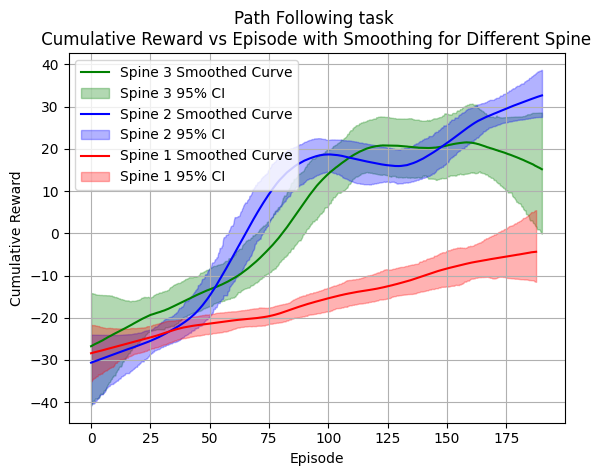

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess

# List of file paths and colors for each plot
file_paths = ['path_spine3/monitor1.csv','path_spine2/combined_moniter.csv', 'path_spine1/monitor.csv']
colors = ["green",'blue', 'red']
labels = ['Spine 3','Spine 2', 'Spine 1']

# Number of bootstrap samples
n_bootstraps = 100

# Loop through each file and plot
for i, file_path in enumerate(file_paths):
    # Load the data
    file_data = pd.read_csv(file_path)
    data = file_data[file_data['Episode'] <=190]

    x = data['Episode'].to_numpy()  # Convert to NumPy array
    y = data['Cum Reward'].to_numpy()  # Convert to NumPy array

    # Storage for bootstrapped smoothed curves
    smoothed_bootstraps = []

    # Generate bootstrapped smoothed curves
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(x), len(x), replace=True)
        bootstrap_x = x[indices]
        bootstrap_y = y[indices]
        smoothed = lowess(bootstrap_y, bootstrap_x, frac=0.3)
        smoothed_bootstraps.append(smoothed)

    # Extract smoothed values from bootstraps
    smoothed_x = np.mean([sb[:, 0] for sb in smoothed_bootstraps], axis=0)
    smoothed_y_mean = np.mean([sb[:, 1] for sb in smoothed_bootstraps], axis=0)

    # Calculate 95% confidence interval
    smoothed_y_bootstraps = np.array([sb[:, 1] for sb in smoothed_bootstraps])
    ci_lower = np.percentile(smoothed_y_bootstraps, 2.5, axis=0)
    ci_upper = np.percentile(smoothed_y_bootstraps, 97.5, axis=0)

    # Plot smoothed line
    plt.plot(smoothed_x, smoothed_y_mean, color=colors[i], label=f"{labels[i]} Smoothed Curve")

    # Plot shaded region for confidence interval
    plt.fill_between(smoothed_x, ci_lower, ci_upper, color=colors[i], alpha=0.3, label=f"{labels[i]} 95% CI")

# Add labels, title, grid, and legend
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Path Following task \n Cumulative Reward vs Episode with Smoothing for Different Spine ")
plt.grid(True)
plt.legend()

# Show the plot or save it
plt.show()
# plt.savefig("multi_path_smoothed.png")


In [15]:
set(x)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48}

array([ 2.44732477e+01,  8.04373471e+00,  1.20419112e+01,  8.98657266e+00,
       -2.70716400e+02, -2.98491224e+02,  1.38200114e+01, -2.80197910e+02,
        9.39784581e+00,  1.86241300e+01, -2.71794737e+02,  1.07776696e+01,
       -8.39391271e+00,  3.69467572e+00, -2.86363870e+02, -3.00368910e+02,
       -2.84384229e+02, -2.65338261e+02, -1.20518387e+02, -3.03169556e+02,
       -2.22242856e+02, -1.30501272e+02, -2.56085782e+02, -2.53244232e+02,
       -2.60746229e+02, -2.52567664e+02,  7.06622285e+00,  1.39039362e+01,
        1.73660304e+01,  4.99432537e+00,  2.26188160e+01,  2.00935205e+01,
        5.04016301e+00,  9.42124902e+00,  1.74121188e+01,  1.38022647e+01,
        7.92756257e+00,  3.89048413e+00,  1.35017874e+01,  6.88510105e+00,
       -3.11184826e+02, -2.89718581e+02, -3.07094646e+02,  1.92854918e+01,
        5.78699097e+00,  1.90892674e+01, -3.12616429e+02, -2.91789069e+02,
       -2.94283169e+02, -3.06820681e+02, -2.80521063e+02, -1.02171025e+02,
       -1.86340529e+02, -

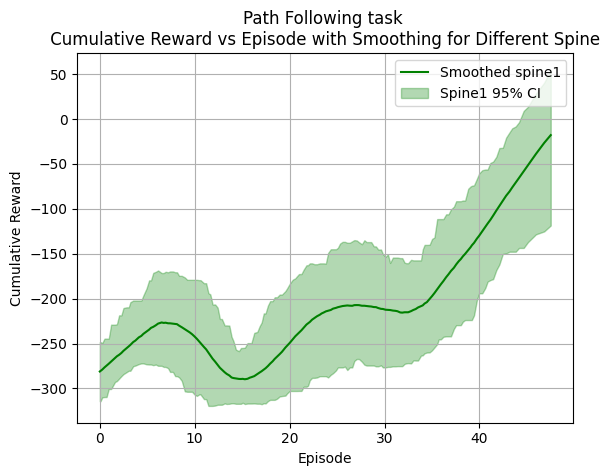

In [14]:
n_bootstraps = 100

file_path="dyn_spine1/monitor.csv"
file_data = pd.read_csv(file_path)
data = file_data[file_data['Episode'] <=190]

x = data['Episode'].to_numpy()  # Convert to NumPy array
y = data['Cum Reward'].to_numpy()  # Convert to NumPy array

# Storage for bootstrapped smoothed curves
smoothed_bootstraps = []

# Generate bootstrapped smoothed curves
for _ in range(n_bootstraps):
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x = x[indices]
    bootstrap_y = y[indices]
    smoothed = lowess(bootstrap_y, bootstrap_x, frac=0.3)
    smoothed_bootstraps.append(smoothed)

# Extract smoothed values from bootstraps
smoothed_x = np.mean([sb[:, 0] for sb in smoothed_bootstraps], axis=0)
smoothed_y_mean = np.mean([sb[:, 1] for sb in smoothed_bootstraps], axis=0)

# Calculate 95% confidence interval
smoothed_y_bootstraps = np.array([sb[:, 1] for sb in smoothed_bootstraps])
ci_lower = np.percentile(smoothed_y_bootstraps, 2.5, axis=0)
ci_upper = np.percentile(smoothed_y_bootstraps, 97.5, axis=0)

# Plot smoothed line
plt.plot(smoothed_x, smoothed_y_mean, color="g", label="Smoothed spine1")

# Plot shaded region for confidence interval
plt.fill_between(smoothed_x, ci_lower, ci_upper, color="green", alpha=0.3, label=f"Spine1 95% CI")

# Add labels, title, grid, and legend
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Path Following task \n Cumulative Reward vs Episode with Smoothing for Different Spine ")
plt.grid(True)
plt.legend()

# Show the plot or save it
plt.show()
# plt.savefig("multi_path_smoothed.png")


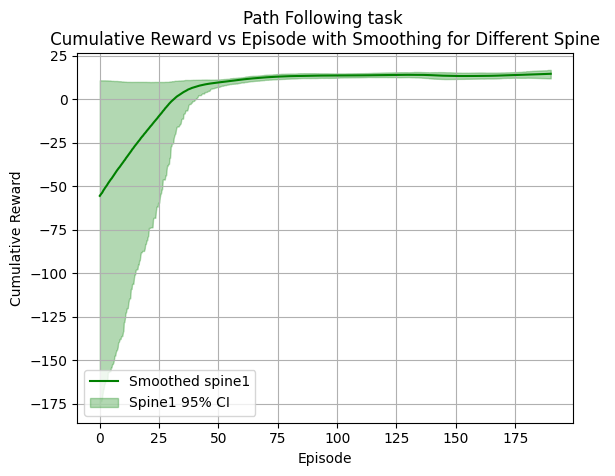

In [10]:
n_bootstraps = 100

file_path="/home/sk-wiz/f_work/dyn_spine1/new_spine1_testing/monitor.csv"
file_data = pd.read_csv(file_path)
data = file_data[file_data['Episode'] <=190]

x = data['Episode'].to_numpy()  # Convert to NumPy array
y = data['Cum Reward'].to_numpy()  # Convert to NumPy array

# Storage for bootstrapped smoothed curves
smoothed_bootstraps = []

# Generate bootstrapped smoothed curves
for _ in range(n_bootstraps):
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x = x[indices]
    bootstrap_y = y[indices]
    smoothed = lowess(bootstrap_y, bootstrap_x, frac=0.3)
    smoothed_bootstraps.append(smoothed)

# Extract smoothed values from bootstraps
smoothed_x = np.mean([sb[:, 0] for sb in smoothed_bootstraps], axis=0)
smoothed_y_mean = np.mean([sb[:, 1] for sb in smoothed_bootstraps], axis=0)

# Calculate 95% confidence interval
smoothed_y_bootstraps = np.array([sb[:, 1] for sb in smoothed_bootstraps])
ci_lower = np.percentile(smoothed_y_bootstraps, 2.5, axis=0)
ci_upper = np.percentile(smoothed_y_bootstraps, 97.5, axis=0)

# Plot smoothed line
plt.plot(smoothed_x, smoothed_y_mean, color="g", label="Smoothed spine1")

# Plot shaded region for confidence interval
plt.fill_between(smoothed_x, ci_lower, ci_upper, color="green", alpha=0.3, label=f"Spine1 95% CI")

# Add labels, title, grid, and legend
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Path Following task \n Cumulative Reward vs Episode with Smoothing for Different Spine ")
plt.grid(True)
plt.legend()

# Show the plot or save it
plt.show()
# plt.savefig("multi_path_smoothed.png")
